In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Optimalizáció

A következő lépés annak meghatározása, hogy hogyan lehet a súlyokat és a torzításokat beállítani a veszteség csökkentése érdekében.

A neuronok bemeneti súlyainak és torzításainak intelligens módon történő beállítása a veszteség minimalizálása érdekében a neurális hálózatok fő nehézsége.

A legprimitívebb megoldás a paraméterek megváltoztatása, a veszteség ellenőrzése, és ennek megismétlése, amíg elégedettek nem leszünk a veszteséggel. A súly- és torzításkombinációk véletlenszerű keresése több millió paraméteres hálózatokban nem megoldás. A súlyok és torzítások lehetséges kombinációinak száma végtelen, és a sikerhez a szerencsénél okosabbra van szükségünk.

A megfelelő megoldással a súlyok és torzítások a véletlenszerűség helyett **abból frissülnek, ami éppen a legkisebb veszteséget eredményezi.**

Algoritmus: _ha a módosítás csökkenti a veszteséget, akkor ez lesz az új érték, ahonnan kiindulva módosítjuk legközelebb. Ha a veszteség nő a módosítás miatt, akkor visszatérünk az előző ponthoz._

Az egyes súlyok és torzítások különböző mértékben befolyásolhatják a veszteséget, ez a befolyás függ maguktól a paraméterektől, valamint az aktuális mintától (az első réteg bemenete). Ez azt jelenti, hogy a kimeneti értékekre gyakorolt hatás a paraméterektől és a mintáktól is függ, ezért számoljuk ki a veszteségértéket minden egyes mintára külön-külön.

Az a függvény, hogy egy súly vagy torzítás hogyan hat a teljes veszteségre, nem feltétlenül lineáris. **Ahhoz, hogy tudjuk, hogyan kell beállítani a súlyokat és torzításokat, először meg kell értenünk, hogy milyen hatással vannak a veszteségre.**

***Azt fogjuk kiszámítani, hogy az egyes egyedi súlyok és torzítások mennyire változtatják meg a veszteségértéket (mekkora hatással vannak rá) egy minta esetén (mivel minden minta külön kimenetet, így külön veszteségértéket is produkál), és hogyan kell megváltoztatni ezt a súlyt vagy torzítást, hogy a veszteségérték csökkenjen.***

A célunk itt a veszteség csökkentése, és ezt a gradiens ereszkedés segítségével fogjuk elérni. A gradiens viszont a parciális deriváltak kiszámításának eredménye, és a láncszabály segítségével visszamenőlegesen fogunk haladni, hogy frissítsük az összes súlyt és torzítást.

<br>

## A paraméter hatása a kimenetre

Tudnunk kell, hogy egy paraméternek mekkora a hatása a loss értékére. De mit értünk hatás alatt?

A kérdés az, hogy milyen hatással van egy függvény a kimenetére? Milyen hatással van egy függvény `x`-re? **Egy mérőszám erre az egyenes meredeksége.** De egy nem lineáris függvény meredeksége nem állandó, változik attól függően, hogy melyik két pont között mérjük.

Mérjük meg a vonal meredekségét `x`-nél (a függvény egy adott bemeneti értékére), így megkapjuk a pillanatnyi meredekséget (meredekséget ebben a pontban), ezt nevezzük a deriváltnak.

In [4]:
def f(x):
    return 2*x

Hozzunk létre egy 5 bemeneti értéket tartalmazó tömböt 0-tól 4-ig, számítsuk ki a függvény kimenetét minden egyes bemeneti értékre, és ábrázoljuk az eredményt az egymást követő pontok közötti vonal formájában. 

In [5]:
x = np.arange(5)  # fügvény bemenete
y = f(x)          # fügvény kimenete

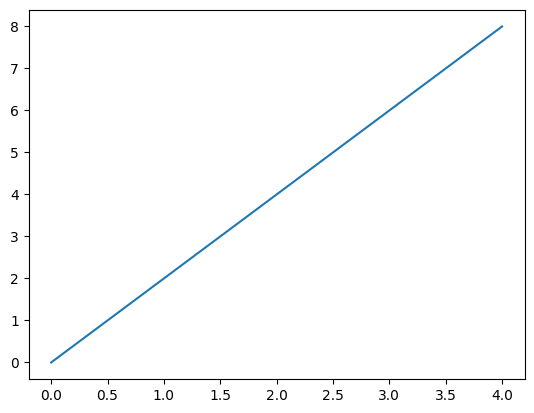

In [6]:
plt.plot(x, y)
plt.show()

---

### A meredekség

**Egy lineáris függvény x-re gyakorolt hatása leírható a meredekséggel.**

A meredekség kiszámításához a függvény grafikonján lévő két tetszőleges pontot kell kivonnunk egymásból. A pontok kivonása azt jelenti, hogy kivonjuk az x és y dimenziójukat. Az y változásának az x változásával való osztása adja a meredekséget:

$\Huge m = \frac{p_{x2}-p_{x1}}{p_{y2}-p_{y1}}$

`f(x)` fügvénynek `2x` a meredeksége, vagyis a függvény hatása a bemenetre `2*input`.

In [7]:
y[1]-y[0] / x[1]-x[0]

2.0

De mi a helyzet egy nemlineáris függvénnyel?

In [8]:
def f(x):
    return 2*x**2

In [9]:
x = np.arange(5)
y = f(x)

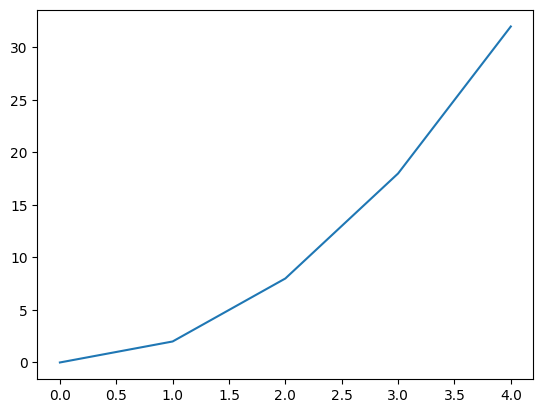

In [10]:
plt.plot(x, y)
plt.show()

**Attól függően, hogy melyik 2 pontot választjuk, különböző meredekségeket fogunk kapni.**

Ha megmérjük az érintővonal meredekségét x-nél (a függvény egy adott bemeneti értékére), akkor **megkapjuk a pillanatnyi meredekséget (meredekséget ebben a pontban), ami a derivált.**

De a meredekség méréséhez két pontra van szükségünk.

**Az érintővonalat úgy hozzuk létre, hogy egy görbén "végtelenül közel" lévő két pont között vonalat húzunk**, de ennek a görbének differenciálhatónak kell lennie a deriválási pontban (ez azt jelenti, hogy folytonosnak és simának kell lennie).

A függvény deriváltját x-nél úgy számoljuk ki, hogy ezt a pontot és egy másik, szintén x-nél vett pontot használunk, de egy nagyon kis delta hozzáadásával, például 0.0001

*Ezt a számot használjuk, mivel nem okoz túl nagy hibát (a derivált becslésénél), és nem okozza az egész kifejezés numerikusan instabilságát (Δx a lebegőpontos számok felbontása miatt 0-ra kerekíthet).*

Ez lehetővé teszi, hogy ugyanazt a számítást végezzük el a meredekségre mint a lineáris függvénynél: veszünk két pontot, de két olyan ponton, amik nagyon közel vannak egymáshoz, így **az x-nél jó közelítést kapunk (az aktuális) meredekségre.**

In [11]:
delta = 0.0001

x1 = 1
x2 = x1 + delta

y1 = f(x1)  # kimenet a deriválni kívánt pontnál
y2 = f(x2)  # a másik, "végtelenül" közeli pont kimenete

In [12]:
(y2-y1)/(x2-x1)

4.0001999999987845

Tudjuk, hogy itt a meredekségnek 4-nek kell lennie. A kis eltérés a módszerből származik.

---

In [22]:
x = np.arange(0, 5, 0.001)
y = f(x)

---

Most szeretnénk egy egyenest, mégpedig egy adott ponthoz való érintőt, ahol az egyenes meredeksége a görbe (aktuális pontban vett) meredeksége.

Az egyenes egyenletének képlete: 

$y = mx+b$

- $m$ a meredekség vagy a *közelítőx derivált* (amit már kiszámoltunk)
- $x$ a bemeneti érték aminek kiszámoltunk a *közelítőx derivált*ját

Már csak a $b$, vagyis az y tengely metszéspontját kell kiszámítani. (Az $b$ segítségével "mozgathatjuk" az egyenest felfelé vagy lefelé.)

Át kell rendezni az egyenes egyenletét:

$b = y-mx$

Eddig két pontot használtunk (azt a pontot, ahol a deriváltat ki akarjuk számítani, és a hozzá "elég közel" lévő pontot), hogy kiszámítsuk a derivált (az egyenes meredekségének) közelítését. Erre azért volt szükség, hogy megkapjuk a $b$ értékét vagyis, hogy az egyenes hol metszi y tengelyt.

Ha az egyenletbe behelyezzük a deriváltalt akkor megkapjuk az egyenes y értékét a deriválási pontban:

$b = y-derivált*x$

In [24]:
# deriválás
delta = 0.0001
x1 = 2
x2 = x1 + delta

y1 = f(x1)
y2 = f(x2)

derivalt = (y2-y1)/(x2-x1)

In [25]:
derivalt

8.000199999998785

In [26]:
b = y2 - derivalt * x2

In [27]:
b

-8.00039999999757

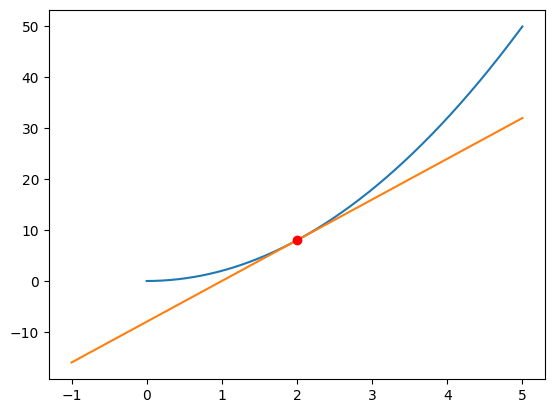

In [31]:
plt.plot(x, y)

# meghosszabítjuk az amúgy nagyon rövid egyenest, hogy jobban lássuk
to_plot_x = [x1-3, x1+3] 
to_plot_y = [to_plot_x[0]*derivalt+b, to_plot_x[1]*derivalt+b]
plt.plot(to_plot_x, to_plot_y)

# ebben a pontban deriváltunk
plt.plot(x1, y1, 'ro') 
plt.show()

A narancssárga vonal az $f(x)=2x^2$ függvény közelítő érintővonala $x=2$-nél.

Különböző bemenetek (x) esetén láthatjuk a különböző meredekségű értintővonalat:

In [32]:
def f(x):
    return 2*x**2

def derivalas(x1):
    delta = 0.0001
    x2 = x1 + delta
    y1, y2 = f(x1), f(x2)
    
    derivative = (y2-y1)/(x2-x1)
    b = y1 - (derivative * x1)
    
    print(f'xy: ({x1}, {y1}) - derivált (meredekség): {round(derivative, 2)}')

    # plot vonal
    to_plot_x = [x1-0.8, x1+0.8] 
    to_plot_y = [to_plot_x[0]*derivative+b, to_plot_x[1]*derivative+b]
    plt.plot(to_plot_x, to_plot_y)

    # plot pont
    plt.plot(x1, y1, 'ro') 

xy: (0, 0) - derivált (meredekség): 0.0
xy: (1, 2) - derivált (meredekség): 4.0
xy: (2, 8) - derivált (meredekség): 8.0
xy: (3, 18) - derivált (meredekség): 12.0
xy: (4, 32) - derivált (meredekség): 16.0


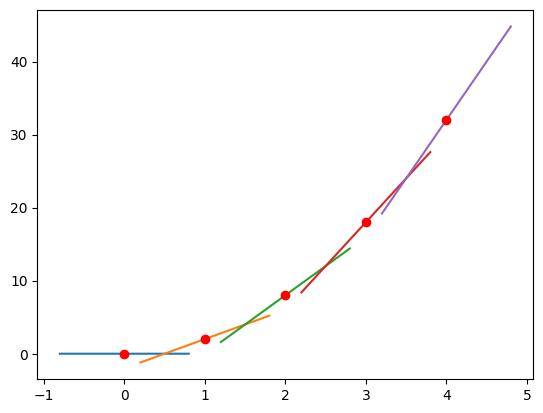

In [33]:
for i in range(5):
    derivalas(i)

**Minket csak ennek az érintővonalnak a meredeksége érdekel, mert tájékoztat arról, hogy x milyen hatással van a függvényre egy adott ponton**, amit pillanatnyi változási sebességnek nevezünk. 

Ezt a fogalmat arra fogjuk használni, hogy meghatározzuk egy adott súly vagy torzítás hatását a teljes veszteségfüggvényre egy adott minta esetén.

----

A neurális hálózatunkban alkalmazott tényleges függvény nem ilyen egyszerű. **A veszteségfüggvény tartalmazza az összes réteget, súlyt és torzítást: ez egy hatalmas, több dimenzióban működő függvény.**

A deriváltak numerikus kiszámítása több előrelépést igényel egyetlen paraméter frissítése során. Először végrehajtunk egy előrelépést referenciaként, majd egy kis változást (deltát) alkalmazunk egy paraméterre, és újra végrehajtjuk az előrelépést a hálózaton, hogy megfigyeljük, hogyan változik a veszteség. Ezután kiszámítjuk a deriváltat, és visszaállítjuk a módosított paramétert. Ezt meg kell ismételnünk minden súlyra, torzításra és minden mintára, ami nagyon időigényes lehet. Ezt a módszert tekinthetjük úgy, mint egy egyszerű, de erőforrás-igényes módja a deriváltak kiszámításának.

Összefogalalás:

A derivált az érintővonal meredeksége egy olyan függvény esetében, amely egyetlen paramétert vesz fel bemenetként. **Ezt arra fogjuk használni, hogy kiszámítsuk a veszteségfüggvény meredekségét az egyes súly- és torzítási pontoknál**.

<br>

## Analitikus derivált

A matematikában a problémák megoldásának két módja van: a numerikus és az analitikus módszerek. 

Az analitikus módszer pontos és számítás szempontjából sokkal gyorsabb megoldást kínál. Egyes analitikus megoldások teljesen nyilvánvalóak, mások egyszerű szabályokkal kiszámíthatók, és egyes **összetett függvények egyszerűbb részekre bonthatók és a láncszabály segítségével kiszámíthatók**. Bizonyos függvények esetében már bevált derivált megoldásokat használhatunk fel, másokat pedig (mint például a veszteségfüggvényünket) a fentiek kombinációival oldhatunk meg.

**Ahhoz, hogy analitikus módszerrel kiszámítsuk a függvények deriváltját, egyszerű, elemi függvényekre bonthatjuk őket, ezek deriváltjait megkeresve, majd a láncszabályt alkalmazva, megkapjuk a teljes deriváltat.** (így nem kell idő- és erőforrásigényes számításokat végezni).

**A parciális deriváltak több paraméterrel rendelkező függvények: egyszerre csak az egyik paraméter tekintetében fogjuk kiszámítani a deriváltat.**

<br> 

### Konstans

**Egy konstans függvény deriváltja mindig 0**, mivel nincsen merredeksége (minden x értéken ugyan az az y értéke). A szabály:

$f(x)=1$

$f'(x)=0$


<br>

### Lineáris 

Egy lineáris függvény deriváltja egyenlő a függvény meredekségével. **Vagyis a lineáris függvény deriváltja a bemeneti (x) érték szorzója.**

$f(x)=mx$

$f'(x)=m$

*Most találtunk egy egyszerűbb módszert egy lineáris függvény deriváltjának kiszámítására, és általánosítottuk azt a különböző meredekségű egyenletekre is. De ez már egy pontos derivált, nem pedig közelítés, mint a numerikus differenciálásnál.*

Példa feladatok:


$f(x)=x \quad \rightarrow \quad \frac{d}{d x} f(x)=\frac{d}{d x} x=\frac{d}{d x} x^1=1 \cdot x^{1-1}=1 \cdot x^0=1 \cdot 1=1$

$f(x)=2 x \quad \rightarrow \quad \frac{d}{d x} f(x)=\frac{d}{d x} 2 x=2 \cdot \frac{d}{d x} x=2 \cdot 1 x^{1-1}=2 \cdot 1 x^0=2 \cdot 1=2$



<br>

### Exponens

Szabályunk:

$f(x)=x^n$

$f'(x)=nx^{n-1}$

Vagyis vegyük az exponenset (pl. 2) és használjuk a származtatott érték együtthatójaként, majd vonjuk ki az exponensből az 1-et (2-1=1) 

$f(x^2) = f'(2x)$


Összevont példa feladat:

*Először alkalmazzuk a lineáris szabályt: az együtthatót (a másik értéket megszorzó értéket) a deriválton kívülre helyezhetjük. Majd végezzük el az exponens szabályt:*

$f(x)=3 x^2 \rightarrow \frac{d}{d x} f(x)=\frac{d}{d x} 3 x^2=3 \cdot \frac{d}{d x} x^2=3 \cdot 2 x^{2-1}=3 \cdot 2 x^1=6 x$


<br>

### Összeadás, kivonás

Egy összegművelet deriváltja a deriváltak összege, így egy bonyolultabb összegművelet deriváltját feloszthatjuk az egyenlet minden egyes tagjának deriváltjainak összegére, és a derivált többi részét a már ismert módszerekkel oldhatjuk meg.

$f(3x^2+5x)$

$f'(3x^2) + f'(5x)$

$[f'(3x^2)=6x] + [f'(5x)=5]$

$6x+5$


<br>

### Két fontos szabály

#### 1. Szabály

A függvény konstans többszörösének deriváltja egyenlő a függvény deriváltjának konstans többszörösével.

$\huge \frac{d}{dx}[kf(x)] = k\frac{d}{dx}[f(x)]$ 

<br>

#### 2. Szabály: összeg szabály

A függvények összegének deriváltja egyenlő a függvények deriváltjainak összegével:

$\huge \frac{d}{dx}[f(x)+g(x)] = \frac{d}{dx}f(x) + \frac{d}{dx}f(g)$ 

Ugyanez vonatkozik a kivonásra is.


<br>

## A parciális derivált

A neurális hálózatoknál olyan függvényekkel fogunk dolgozni, amik több paramétert fogadnak bemenetként. A neurális hálózatunk neuronokból áll, amiknek több bemenetük van. Minden bemenetet megszorozunk a megfelelő súllyal (2 paraméter függvénye), és ezeket összegezzük és hozzáadjuk a torzítást (még egy paraméter).

Ahhoz, hogy megtudjuk az összes bemenet, súly és torzítás hatását a neuron kimenetére a veszteségfüggvény végén, ki kell számolnunk az egyes műveletek deriváltját, amiket az előremenő lépés során a neuronban és a teljes modellben végeztünk.

<br>

### Parciális deriválás alapjai

**A parciális derivált azt méri, hogy egyetlen bemenet mekkora hatással van egy több bemenetes függvény kimenetére.** A parciális derivált kiszámításának módszere ugyanaz, mint a deriváltaké, egyszerűen csak meg kell ismételnünk ezt minden egyes bemenetre, **miközben az összes többi bemenetet konstansként kezeljük.** Ezzel megmondhatjuk minden bemenet hatását külön a kimenetre.

A függvény minden egyes bemenetének van valamilyen hatása a függvénynek a kimenetére, még akkor is, ha a hatás 0. Ezért minden egyes bemenetre külön ki kell számítanunk a deriváltat.

**A részleges derivált egyetlen egyenlet, a teljes többváltozós függvény deriváltja pedig egy egyenlethalmazból áll, amit gradiensnek nevezünk. A gradiens a bemenetek nagyságának vektora, ami az egyes bemenetekhez viszonyított részleges derivált megoldásokat tartalmazza.**

A parciális derivált jelölésére az Euler jelölését használjuk: a $d$ differenciáloperátort kell $∂$-ra cserélnünk.

$$\huge
f(x, y, z) \rightarrow \frac{\partial}{\partial x} f(x, y, z), \frac{\partial}{\partial y} f(x, y, z), \frac{\partial}{\partial z} f(x, y, z)
$$
_Az egyetlen különbség a nem többváltozós deriváltakhoz képest annyi, hogy minden változó tekintetében külön-külön deriválunk._

A szinguláris bemenetek hatása érdekel minket, mivel a modellben a célunk a paraméterek frissítése. 

#### Példa feladat 1

$f(x, y)=x+y$

Kiszámoljuk minden bemenet deriváltját úgy, hogy a többi bemenetet konstansként kezeljük. Először x viszonlatában y-t konstansként kezelve:

$\large \frac{\partial}{\partial x} f(x, y)=\frac{\partial}{\partial x}[x+y]=\frac{\partial}{\partial x} x+\frac{\partial}{\partial x} y=1+0=1$

Az összeg szabályt alaklamzva kiszámolunk egy konstans és egy lineráis deriváltat, majd összeadjuk őket. Ugyan ezt elvégezzük fordítva: y viszonlatában származtatva:

$\large \frac{\partial}{\partial y} f(x, y)=\frac{\partial}{\partial y}[x+y]=\frac{\partial}{\partial y} x+\frac{\partial}{\partial y} y=0+1=1$

<br>

#### Példa feladat 2

$f(x, y)= 2 x+3 y^2$

Kiszámolom a deriváltat x viszonlatában y-t konstansként kezelve:

$\large \frac{\partial}{\partial x} f(x, y) =\frac{\partial}{\partial x}\left[2 x+3 y^2\right]=\frac{\partial}{\partial x} 2 x+\frac{\partial}{\partial x} 3 y^2 = 2 \cdot \frac{\partial}{\partial x} x+3 \cdot \frac{\partial}{\partial x} y^2=2 \cdot 1+3 \cdot 0=2$

Kiszámolom a deriváltat y viszonlatában x-et konstansként kezelve:

$\large \frac{\partial}{\partial y} f(x, y) =\frac{\partial}{\partial y}\left[2 x+3 y^2\right]=\frac{\partial}{\partial y} 2 x+\frac{\partial}{\partial y} 3 y^2 =2 \cdot \frac{\partial}{\partial y} x+3 \cdot \frac{\partial}{\partial y} y^2=2 \cdot 0+3 \cdot 2 y^1=6 y$


<br>

#### Példa feladat 3


$f(x, y)=3 x^3-y^2 +5 x+2$

$\frac{\partial}{\partial x} f(x, y) =\frac{\partial}{\partial x}\left[3 x^3-y^2+5 x+2\right]=\frac{\partial}{\partial x} 3 x^3-\frac{\partial}{\partial x} y^2+\frac{\partial}{\partial x} 5 x+\frac{\partial}{\partial x} 2= 3 \cdot \frac{\partial}{\partial x} x^3-\frac{\partial}{\partial x} y^2+5 \cdot \frac{\partial}{\partial x} x+\frac{\partial}{\partial x} 2=3 \cdot 3 x^2-0+5 \cdot 1+0=9 x^2+5$

$\frac{\partial}{\partial y} f(x, y) =\frac{\partial}{\partial y}\left[3 x^3-y^2+5 x+2\right]=\frac{\partial}{\partial y} 3 x^3-\frac{\partial}{\partial y} y^2+\frac{\partial}{\partial y} 5 x+\frac{\partial}{\partial y} 2=3 \cdot \frac{\partial}{\partial y} x^3-\frac{\partial}{\partial y} y^2+5 \cdot \frac{\partial}{\partial y} x+\frac{\partial}{\partial y} 2=3 \cdot 0-2 y^1+5 \cdot 0+0=-2 y$

<br>

### Az összeadás parciális deriválása

Az összeg parciális deriváltja bármely bemenetre vonatkoztatva egyenlő 1-gyel:

$\huge f(x, y)=x+y $

$\large \frac{\partial}{\partial x} f(x, y) = 1$

$\large \frac{\partial}{\partial y} f(x, y) = 1$


<br>

### A szorzás parciális deriválása

Ha a két bemenet szorzata a kimenet akkor a levezetés során konstansként kezeljük a másik változót, így derivált a (konstansként kezelt) másik változó lesz. 

Az eredményben más változók is szerepelnek, de csak azért mert ezeket a levezetés során konstansként kezeljük. 

**A 2 bemenettel végzett szorzási művelet parciális deriváltja bármely bemenetre vonatkoztatva egyenlő a másik bemenettel.**


$\large f(x, y)=x \cdot y$

$\large \frac{\partial}{\partial x} f(x, y)=\frac{\partial}{\partial x}[x \cdot y]=y \frac{\partial}{\partial x} x=y \cdot 1=y$

$\large \frac{\partial}{\partial y} f(x, y)=\frac{\partial}{\partial y}[x \cdot y]=x \frac{\partial}{\partial y} y=x \cdot 1=x$


<br>

### A parciális deriváltak megismerésének oka

A kódban a Dense layer osztálynak egy tömböt adunk át (a bemeneti tömböt, ami vagy egy mintát, vagy az előző réteg kimeneteit tartalmazza). **A tömbnek minden egyes értéke egy (és az összes) neuron bemenete.** Egy neuronnak annyi bemenete van hány elemű a bemeneti tömb. Így egy neuron egy függvényt alkot. **Ahhoz, hogy megtudjuk, hogy az egyes bemenetek milyen hatással vannak a függvény kimenetére, ki kell számítanunk ennek a függvénynek a részleges deriváltját minden egyes bemenetek függvényeire.**

<br>

### A max függvény parciális deriválása

A deriváltakat le kell származtatnunk az összes felhasznált függvényre is, ezek közül az egyik a `max()` függvény (amit az aktivációs függvényben használunk).

A max függvény a legnagyobb bemeneti értéket adja vissza.

A max függvény deriváltja x-re vonatkoztatva:
- Tudjuk, hogy x deriváltja 1, így ennek a függvénynek **a deriváltja 1, ha x nagyobb, mint y, mivel a függvény x-et fog visszaadni**
- Amikor y nagyobb, mint x, akkor y-t kapjuk vissza, ekkor a függvény deriváltja 0, mivel y-t konstansként kezeljük (így deriváltja 0)

$\large \frac{\partial}{\partial x} \max (x, y)=1(x > y)0$

_1(x > y)0 jelölés azt jelenti, hogy 1, ha a feltétel teljesül, egyébként 0_

---

A `max()` függvény deriváltjának egy speciális esete, amikor csak egy változó paraméterünk van, és a másik paraméter állandó 0. 

Ez azt jelenti, hogy azt akarjuk, hogy ha a bemenet nagyobb 0-nál akkor azt kapjuk vissza ellenkező esetben pedig 0-át (vagyis vágjuk a bemeneti értéket 0-nál). Ez akkor lesz hasznos, amikor a ReLU aktiválási függvény deriváltját számoljuk ki.

$\large \frac{d}{d x} \max (x, 0)=1(x > 0)0 $

_Vagyis a derivált értéke 1, ha x nagyobb, mint 0, egyébként 0._

<br>

## A gradiens

**A gradiens egy vektor, ami egy függvény minden egyes bemeneti változóhoz viszonyított részleges deriváltjaiból áll.**

Vagyis a függvény összes lehetséges parciális deriváltjának vektora, és a nabla szimbólummal jelöljük: $∇$


Van egy függvényem három bemeneti változóval:

$f(x, y, z)=3 x^{3} z-y^{2}+5 z+2 y z $

Kiszámolom mind a három particiális deriváltját:

$x \rightarrow \frac{\partial}{\partial x} f(x, y, z) =9 x^{2} z$

$y \rightarrow \frac{\partial}{\partial y} f(x, y, z) =-2 y+2 z$

$z \rightarrow \frac{\partial}{\partial z} f(x, y, z) =3 x^{3}+5+2 y$

Tehát ebben az esetben a gradiensem:

$\nabla f(x, y, z)=\left[\begin{array}{c}\frac{\partial}{\partial x} f(x, y, z) \\ \frac{\partial}{\partial y} f(x, y, z) \\ \frac{\partial}{\partial z} f(x, y, z)\end{array}\right]=\left[\begin{array}{c}9 x^{2} z \\ -2 y+2 z \\ 3 x^{3}+5+2 y\end{array}\right]$

<br>

## A láncszabály

Az előrehaladás során az adatokat átvezetjük a neuronokon, majd az aktiváló függvényen, majd a következő réteg neuronjain, majd egy újabb aktiváló függvényen, és így tovább. **Meghívunk egy függvényt egy bemeneti paraméterrel, veszünk egy kimenetet, és ezt a kimenetet egy másik függvény bemeneteként használjuk.**

A teljes neurális hálózat ilyen függvények láncolata.

Ez felírható egyben is:

$y=g(f(x))$

A $g$ függvény közvetlenül az $f$ függvény kimenetét veszi bemenetként. 

**Ez a felírás megmutatja a láncolt függvények egy fontos tulajdonságát:** mivel $x$ az $f$ függvény bemenete, majd az $f$ függvény kimenete a $g$ függvény bemenete, **a $g$ függvény kimenetét $x$ közvetlenül befolyásolja, így léteznie kell egy deriváltnak, ami tájékoztat minket erről a hatásról.**

<br>

### Függvények láncolata a neurális hálózatban

Mintákat adunk át a hálózatnak, az adatok átmennek az összes rétegen az összes aktiválási függvényen, majd az utolsó rétegen, ez után a softmax függvényen végül pedig a loss függvényen és ezen függvények láncolatából egy kimenetet alkotunk, egy darab számot: a loss értéket. 


$$\huge
L=-\sum_{l=1}^{N} y_{l} \log \left(\forall_{j=1}^{n_{3}} \frac{e^{\sum_{i=1}^{n_{2}}\left(\forall_{j=1}^{n_{2}} \max \left(0, \sum_{i=1}^{n_{1}}\left(\forall_{j=1}^{n_{1}} \max \left(0, \sum_{i=1}^{n_{0}} X_{i} w_{1, i, j}+b_{1, j}\right)\right)_{i} w_{2, i, j}+b_{2, j}\right)\right)_{i} w_{3, i, j}+b_{3, j}}}{\sum_{k=1}^{n_{3}} e^{\sum_{i=1}^{n_{2}}\left(\forall_{j=1}^{n_{2}} \max \left(0, \sum_{i=1}^{n_{1}}\left(\forall_{j=1}^{n_{1}} \max \left(0, \sum_{i=1}^{n_{0}} X_{i} w_{1, i, j}+b_{1, k}\right)\right)_{i} w_{2, i, j}+b_{2, k}\right)\right)_{i} w_{3, i, k}+b_{3, k}}}\right) 
$$

A veszteségfüggvényt így több függvény láncolata helyett tekinthetjük úgy **mint egy olyan függvényt, ami a célpontokat, a mintákat és az összes súlyt és torzítást bemenetként veszi.**

A veszteség javításához meg kell tudnunk, hogy az egyes súlyok és torzítások hogyan hatnak a kimeneti értékre. Ezt láncszabály használatával tudhajuk meg.

<br>

### Mi a láncszabály?

***A szabály azt mondja ki, hogy egy függvénylánc deriváltja a láncban lévő összes függvény deriváltjainak szorzata.* Vagyis a láncolt függvények deriváltja egyenlő az egymást követő függvények parciális deriváltjainak szorzatával.**


$\huge \frac{d}{d x} f(g(x))=\frac{d f(g(x))}{d g(x)} \cdot \frac{d g(x)}{d x}=f^{\prime}(g(x)) \cdot g^{\prime}(x)$

Először is felírtuk a külső függvény $f(g(x))$ deriváltját a belső függvény $g(x)$, tekintetében (mivel ez a belső függvény a paramétere). Ezután megszoroztuk a belső függvény $g(x)$ paramétere $x$ szerinti deriváltjával. 

- Az első tag: $f$ függvény deriváltja $g(x)$-re vonatkoztatva
- A második tag: $g$ függvény deriváltja $x$-re vonantkoztatva


Mi van ha több bemenetes az egyik függvény: 

$\large f^{\prime}(g(y, h(x, z))) \cdot g^{\prime}(y, h(x, z)) \cdot h^{\prime}(x, z)$


**Ugyanez vonatkozik a parciális deriváltakra is.**

$\huge \frac{\partial}{\partial x} f(g(y, h(x, z)))=\frac{\partial f(g(y, h(x, z)))}{\partial g(y, h(x, z))} \cdot \frac{\partial g(y, h(x, z))}{\partial h(x, z)} \cdot \frac{\partial h(x, z)}{\partial x}$

<br>

#### Feladat

Számoljuk ki a $h$ függvény deriváltját:

$h(x) = 3(2x^2)^5$

Ez egy összetett függvény, két egyszerűbb függvényre bontható. A zárójelben lévő egyenletrész, vehetjük külön függvénynek:

$g(x) = 2x^2$

Az egyenlet fennmaradó része:

$f(y) = 3(y)^5$

Most visszaírva:

$h(x) = f(g(x)) = 3(2x^2)^5$

Kiszámoljuk ennek a függvénynek a deriváltját. A láncszabály szerint a **külső függvény deriváltját meg kell szoroznunk a belső függvény deriváltjával**:

$\large h^{\prime}(x)=f^{\prime}(g(x)) \cdot g^{\prime}(x)$

Külső függvény deriváltja:

$\large f^{\prime}(g(x))=3 \cdot 5\left(2 x^{2}\right)^{5-1}=15\left(2 x^{2}\right)^{4}$

_Vegyük észre, hogy a belső függvényt változatlanul hagytuk a külső függvény deriváltján belül._

Belső függvény deriváltja:

$\large g^{\prime}(x) = 2 \cdot 2 x^{1} = 4x$

Lánc szabály szerint meg kell szorozni őket:

$\large h^{\prime}(x)= 15\left(2 x^{2}\right)^{4} \cdot 4x$

Egyszerűsíthetjük az eredményt. A gyorsabb számítás érdekében egyszerűsíteni fogjuk a deriváltakat (nincs értelme megismételni ugyanazokat a műveleteket, ha előre meg tudjuk oldani őket).

$\large =  15 \cdot\left(2^{4} \cdot x^{2 \cdot 4}\right) \cdot 4 x=15 \cdot 2^{4} \cdot x^{8} \cdot 4 x = 15 \cdot 2^{4} \cdot 4 \cdot x^{9} = 960 x^{9}$

